## **imports**


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline


sns.set(style="whitegrid")
%matplotlib inline


**Load Dataset**



In [23]:
# Mount

from google.colab import drive
drive.mount('/content/drive')


# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';', on_bad_lines='skip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df.shape


(1599, 1)

In [24]:
# Basic info
df.info()

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())

# Class distribution of original 'quality' (multiclass)
print("\nOriginal quality value counts:\n", df['quality'].value_counts().sort_index())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar     

**Preprocessing: remove duplicates/missing, create binary target, inspect balance**

In [25]:
# Remove duplicates / missing
df = df.drop_duplicates().dropna().reset_index(drop=True)


# binary target: quality >=7 => good (1), else bad (0)
df['quality_label'] = np.where(df['quality'] >= 7, 1, 0)
df = df.drop(columns=['quality'])  # keep label column only

# Check new target distribution
print("Binary target counts:\n", df['quality_label'].value_counts())
print("Percent good wines: {:.2f}%".format(100 * df['quality_label'].mean()))

df.head()


Binary target counts:
 quality_label
0    1175
1     184
Name: count, dtype: int64
Percent good wines: 13.54%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


**Feature / target split and scaling (StandardScaler)**

In [26]:
X = df.drop(columns=['quality_label'])
y = df['quality_label']

# Feature names
feature_names = X.columns.tolist()

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for plotting convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
X_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


**Visualizations (class distribution, correlation heatmap, a couple feature plots)**

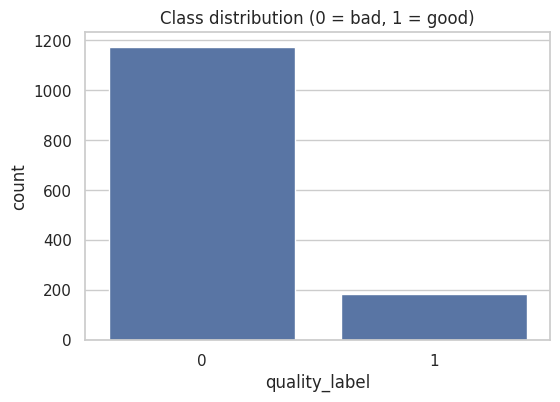

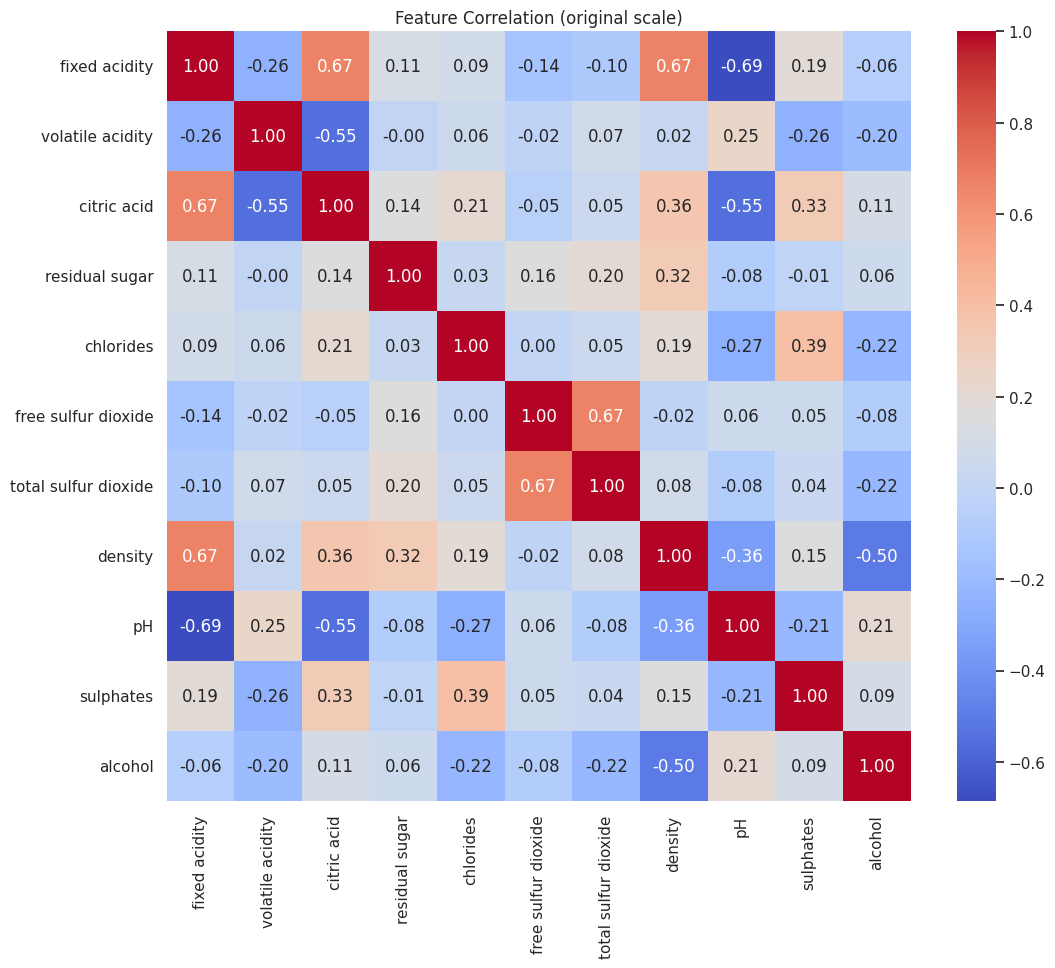

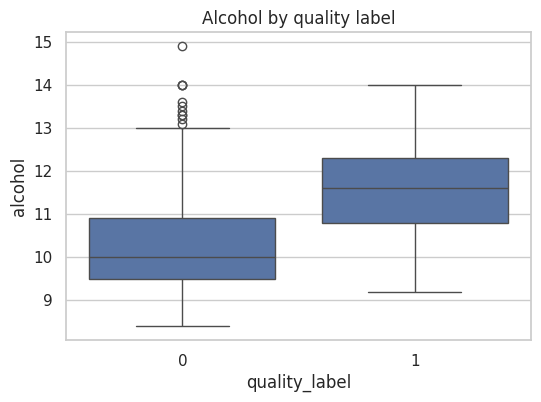

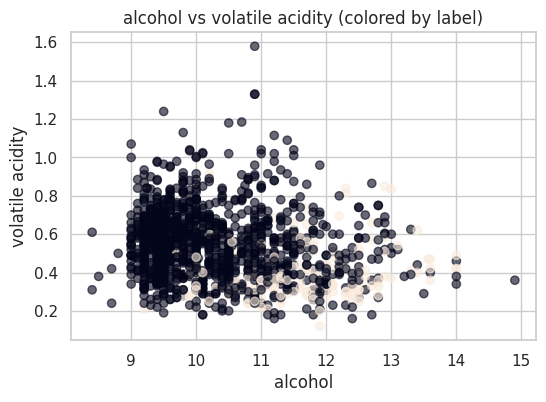

In [27]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class distribution (0 = bad, 1 = good)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation (original scale)")
plt.show()

#  alcohol vs quality_label (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=X['alcohol'])
plt.title("Alcohol by quality label")
plt.xlabel("quality_label")
plt.show()

# Scatter sample
plt.figure(figsize=(6,4))
plt.scatter(X['alcohol'], X['volatile acidity'], c=y, alpha=0.6)
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('alcohol vs volatile acidity (colored by label)')
plt.show()


**Train / Test split (Stratified)**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train label distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("Test label distribution:\n", pd.Series(y_test).value_counts(normalize=True))


Train shape: (1087, 11) Test shape: (272, 11)
Train label distribution:
 quality_label
0    0.864765
1    0.135235
Name: proportion, dtype: float64
Test label distribution:
 quality_label
0    0.863971
1    0.136029
Name: proportion, dtype: float64


**Model 1: Logistic Regression**

In [29]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight optional
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC (LR):", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Accuracy: 0.7904411764705882

Confusion Matrix:
 [[185  50]
 [  7  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       235
           1       0.38      0.81      0.51        37

    accuracy                           0.79       272
   macro avg       0.67      0.80      0.69       272
weighted avg       0.88      0.79      0.82       272

ROC-AUC (LR): 0.8846463484761358


**Model 2: Random Forest**

In [30]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC (RF):", roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.8897058823529411

Confusion Matrix:
 [[229   6]
 [ 24  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       235
           1       0.68      0.35      0.46        37

    accuracy                           0.89       272
   macro avg       0.79      0.66      0.70       272
weighted avg       0.88      0.89      0.87       272

ROC-AUC (RF): 0.8825761932144911


**Improve: Hyperparameter tuning for Random Forest (GridSearchCV)**

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 8, 12, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                    param_grid, scoring='accuracy', n_jobs=-1, cv=cv, verbose=1)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("ROC-AUC (Tuned RF):", roc_auc_score(y_test, y_prob_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RF Accuracy: 0.8897058823529411

Confusion Matrix:
 [[229   6]
 [ 24  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       235
           1       0.68      0.35      0.46        37

    accuracy                           0.89       272
   macro avg       0.79      0.66      0.70       272
weighted avg       0.88      0.89      0.87       272

ROC-AUC (Tuned RF): 0.8825761932144911


In [32]:
import joblib
final_model = best_rf
joblib.dump(final_model, "final_wine_rf_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("Model and scaler saved.")


Model and scaler saved.
